<h1>
    <b>
        CSE-422 Project <br>
        Stress Level Detection System  <br>
    </b>
</h1>
<h3>
Contributors,<br>
<ul>
    <li>Iftikhar Shams Niloy
        <ul>
            <li>24241296 (21101124)
        </ul>
    </li>
    <li>Syeda Mahjabin Proma
        <ul>
            <li>24241295 (21101131)
        </ul>
    </li>
</ul>


# Importing important Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

sns.set(color_codes = True)

# Data Visualization

### Reading the dataset

In [2]:
sleep_health_DATASET = pd.read_csv("SleepHealthAndLifestyleDATASET_NotProcessed.csv")

### Dataset Description

In [3]:
sleep_health_DATASET.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep_health_DATASET.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,194.000000,47.054264,7.162791,8.268734,58.682171,5.935401,70.082687,6784.237726
std,111.861522,46.706499,0.806040,9.360934,20.982222,6.256889,4.162301,1622.313523
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,97.500000,35.500000,6.500000,6.000000,45.000000,4.000000,68.000000,5200.000000
50%,194.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,290.500000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,387.000000,653.000000,8.500000,99.000000,90.000000,88.000000,86.000000,10000.000000


### Null Count

In [5]:
sleep_health_DATASET.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             231
dtype: int64

### Unique Value Count

In [6]:
sleep_health_DATASET.nunique()

Person ID                  387
Gender                       2
Age                         36
Occupation                  11
Sleep Duration              27
Quality of Sleep             7
Physical Activity Level     16
Stress Level                10
BMI Category                 5
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

### Histograms of Features

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


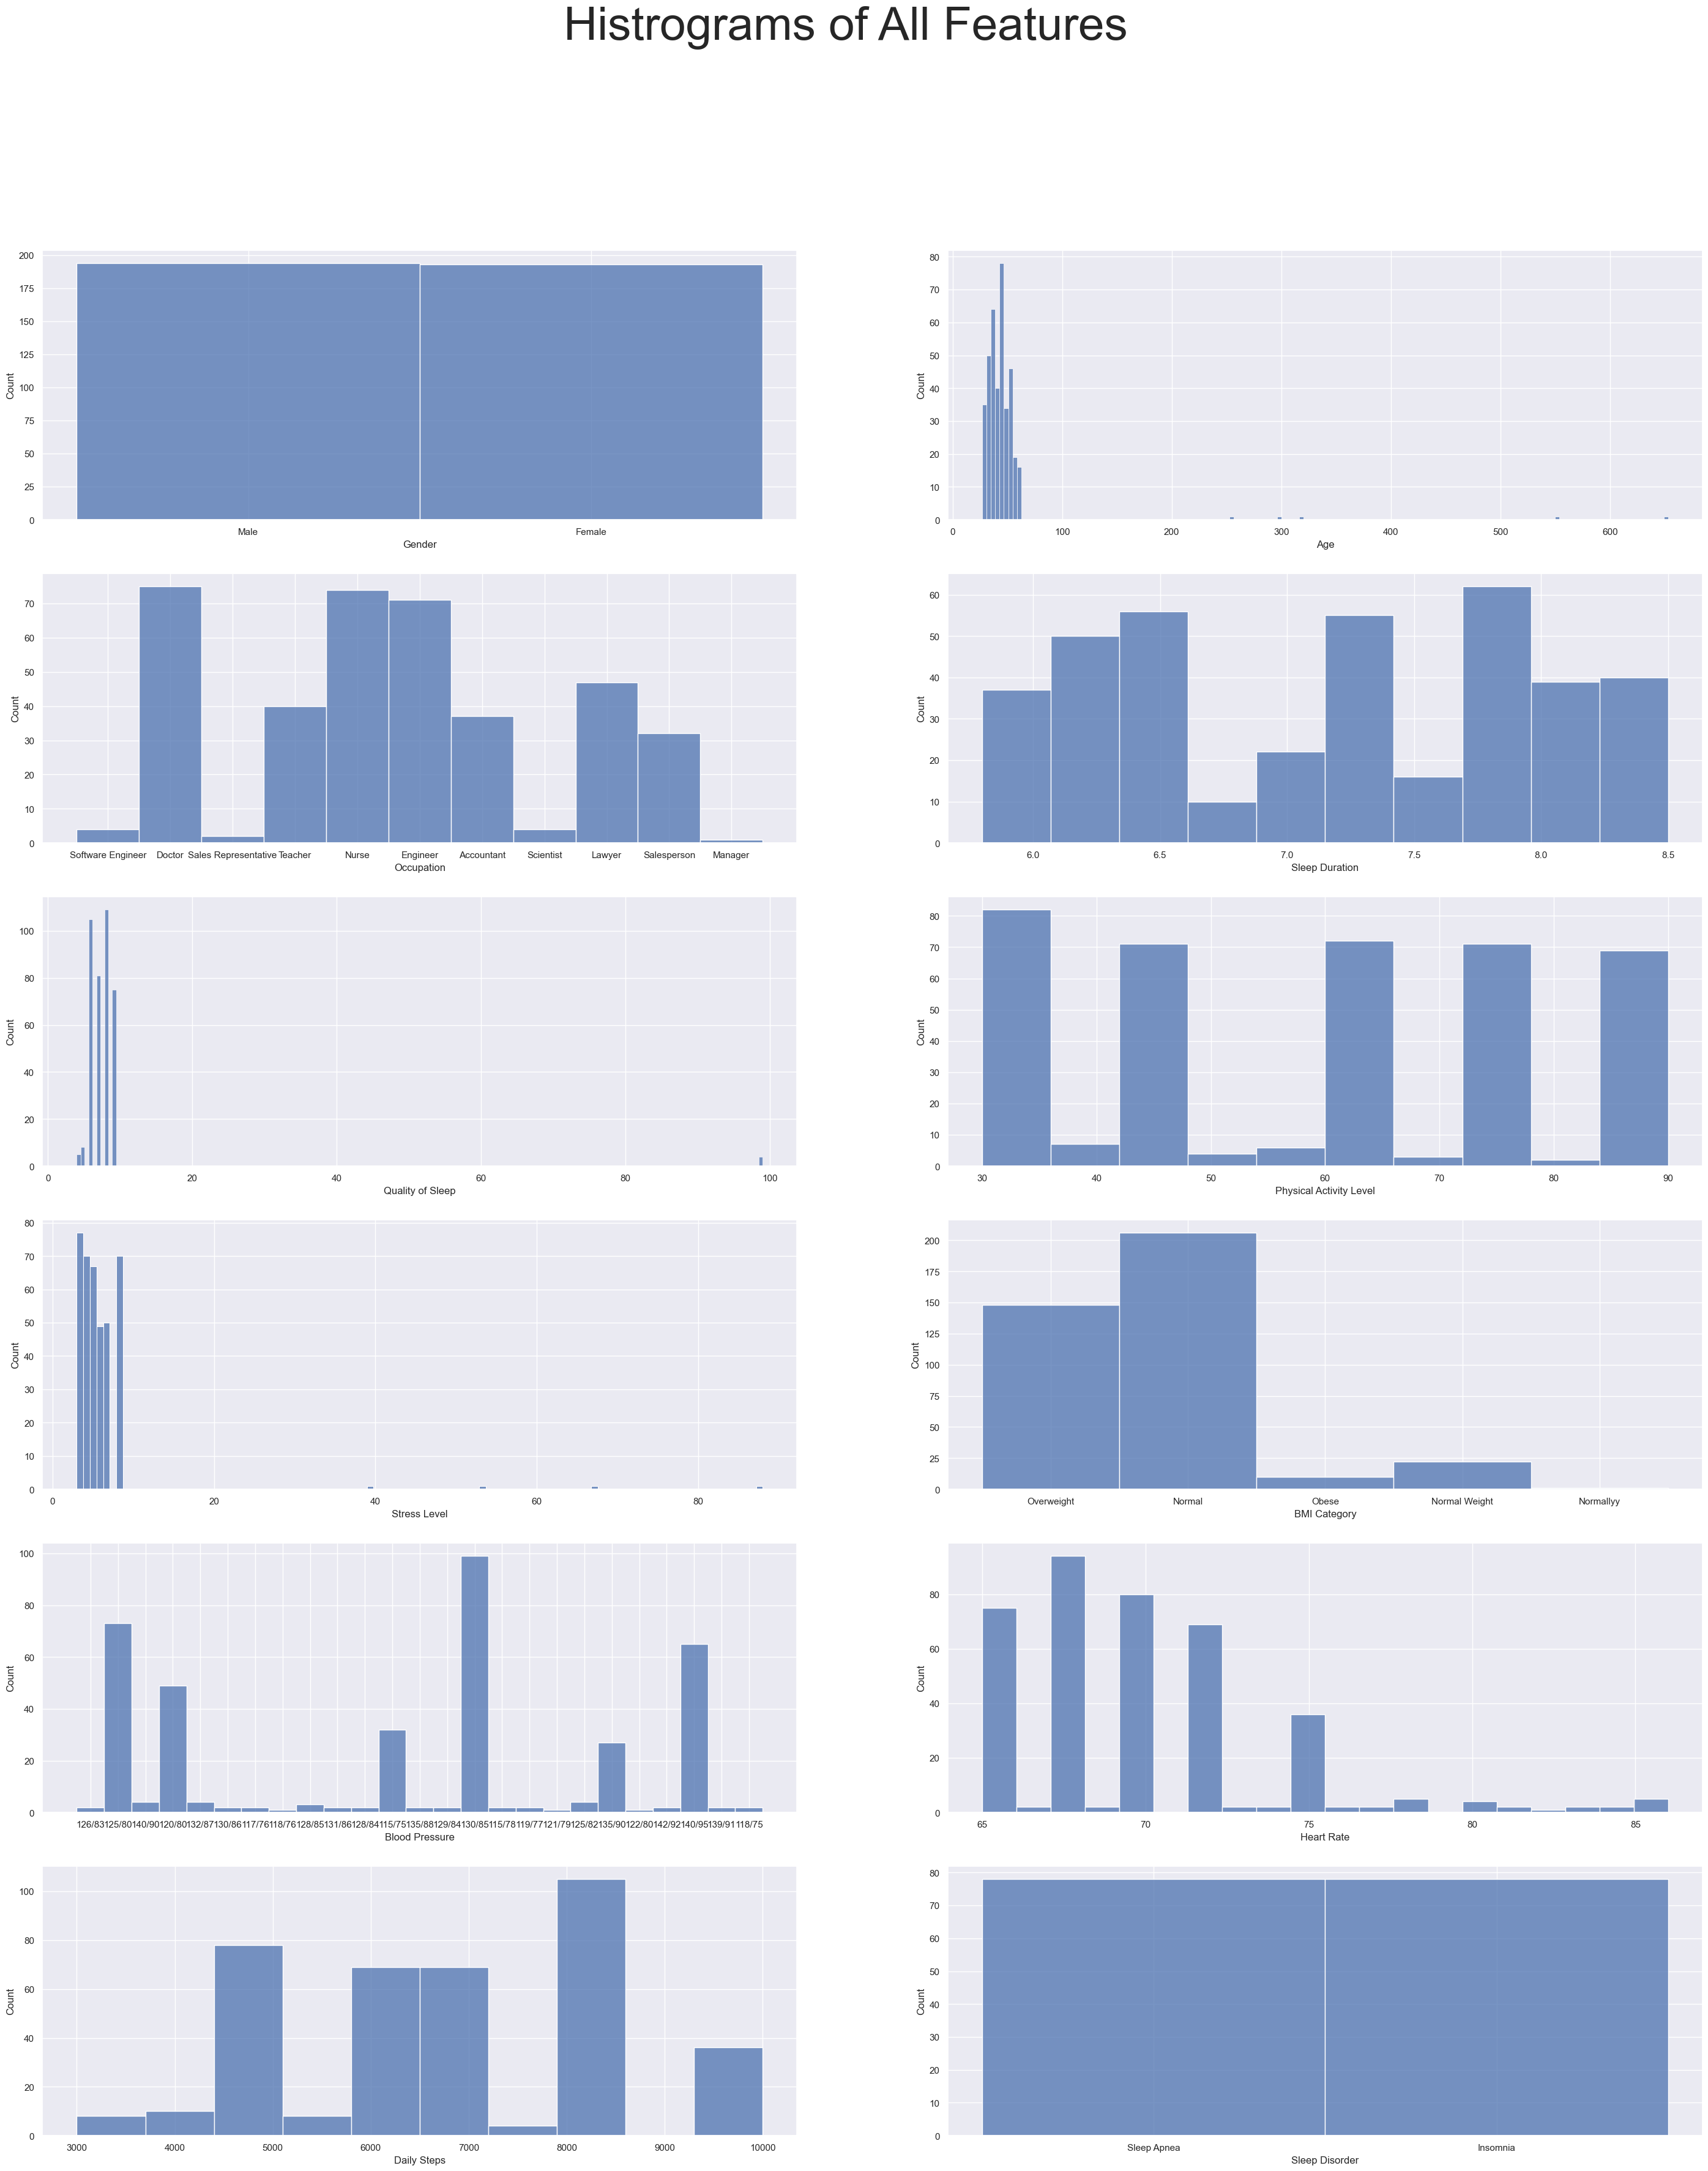

In [7]:
fig, axes = plt.subplots(6,2, figsize=(35,40))
fig.suptitle("Histrograms of All Features", size=55)
lables_list = []

for lable in sleep_health_DATASET.columns:
    lables_list.append(lable)

idx = 0
print(lables_list)
for i in range(6):
    for j in range(2):
        idx += 1
        sns.histplot(ax = axes[i,j],
                     data = sleep_health_DATASET[lables_list[idx]],
                     legend=True)

### Box Plot

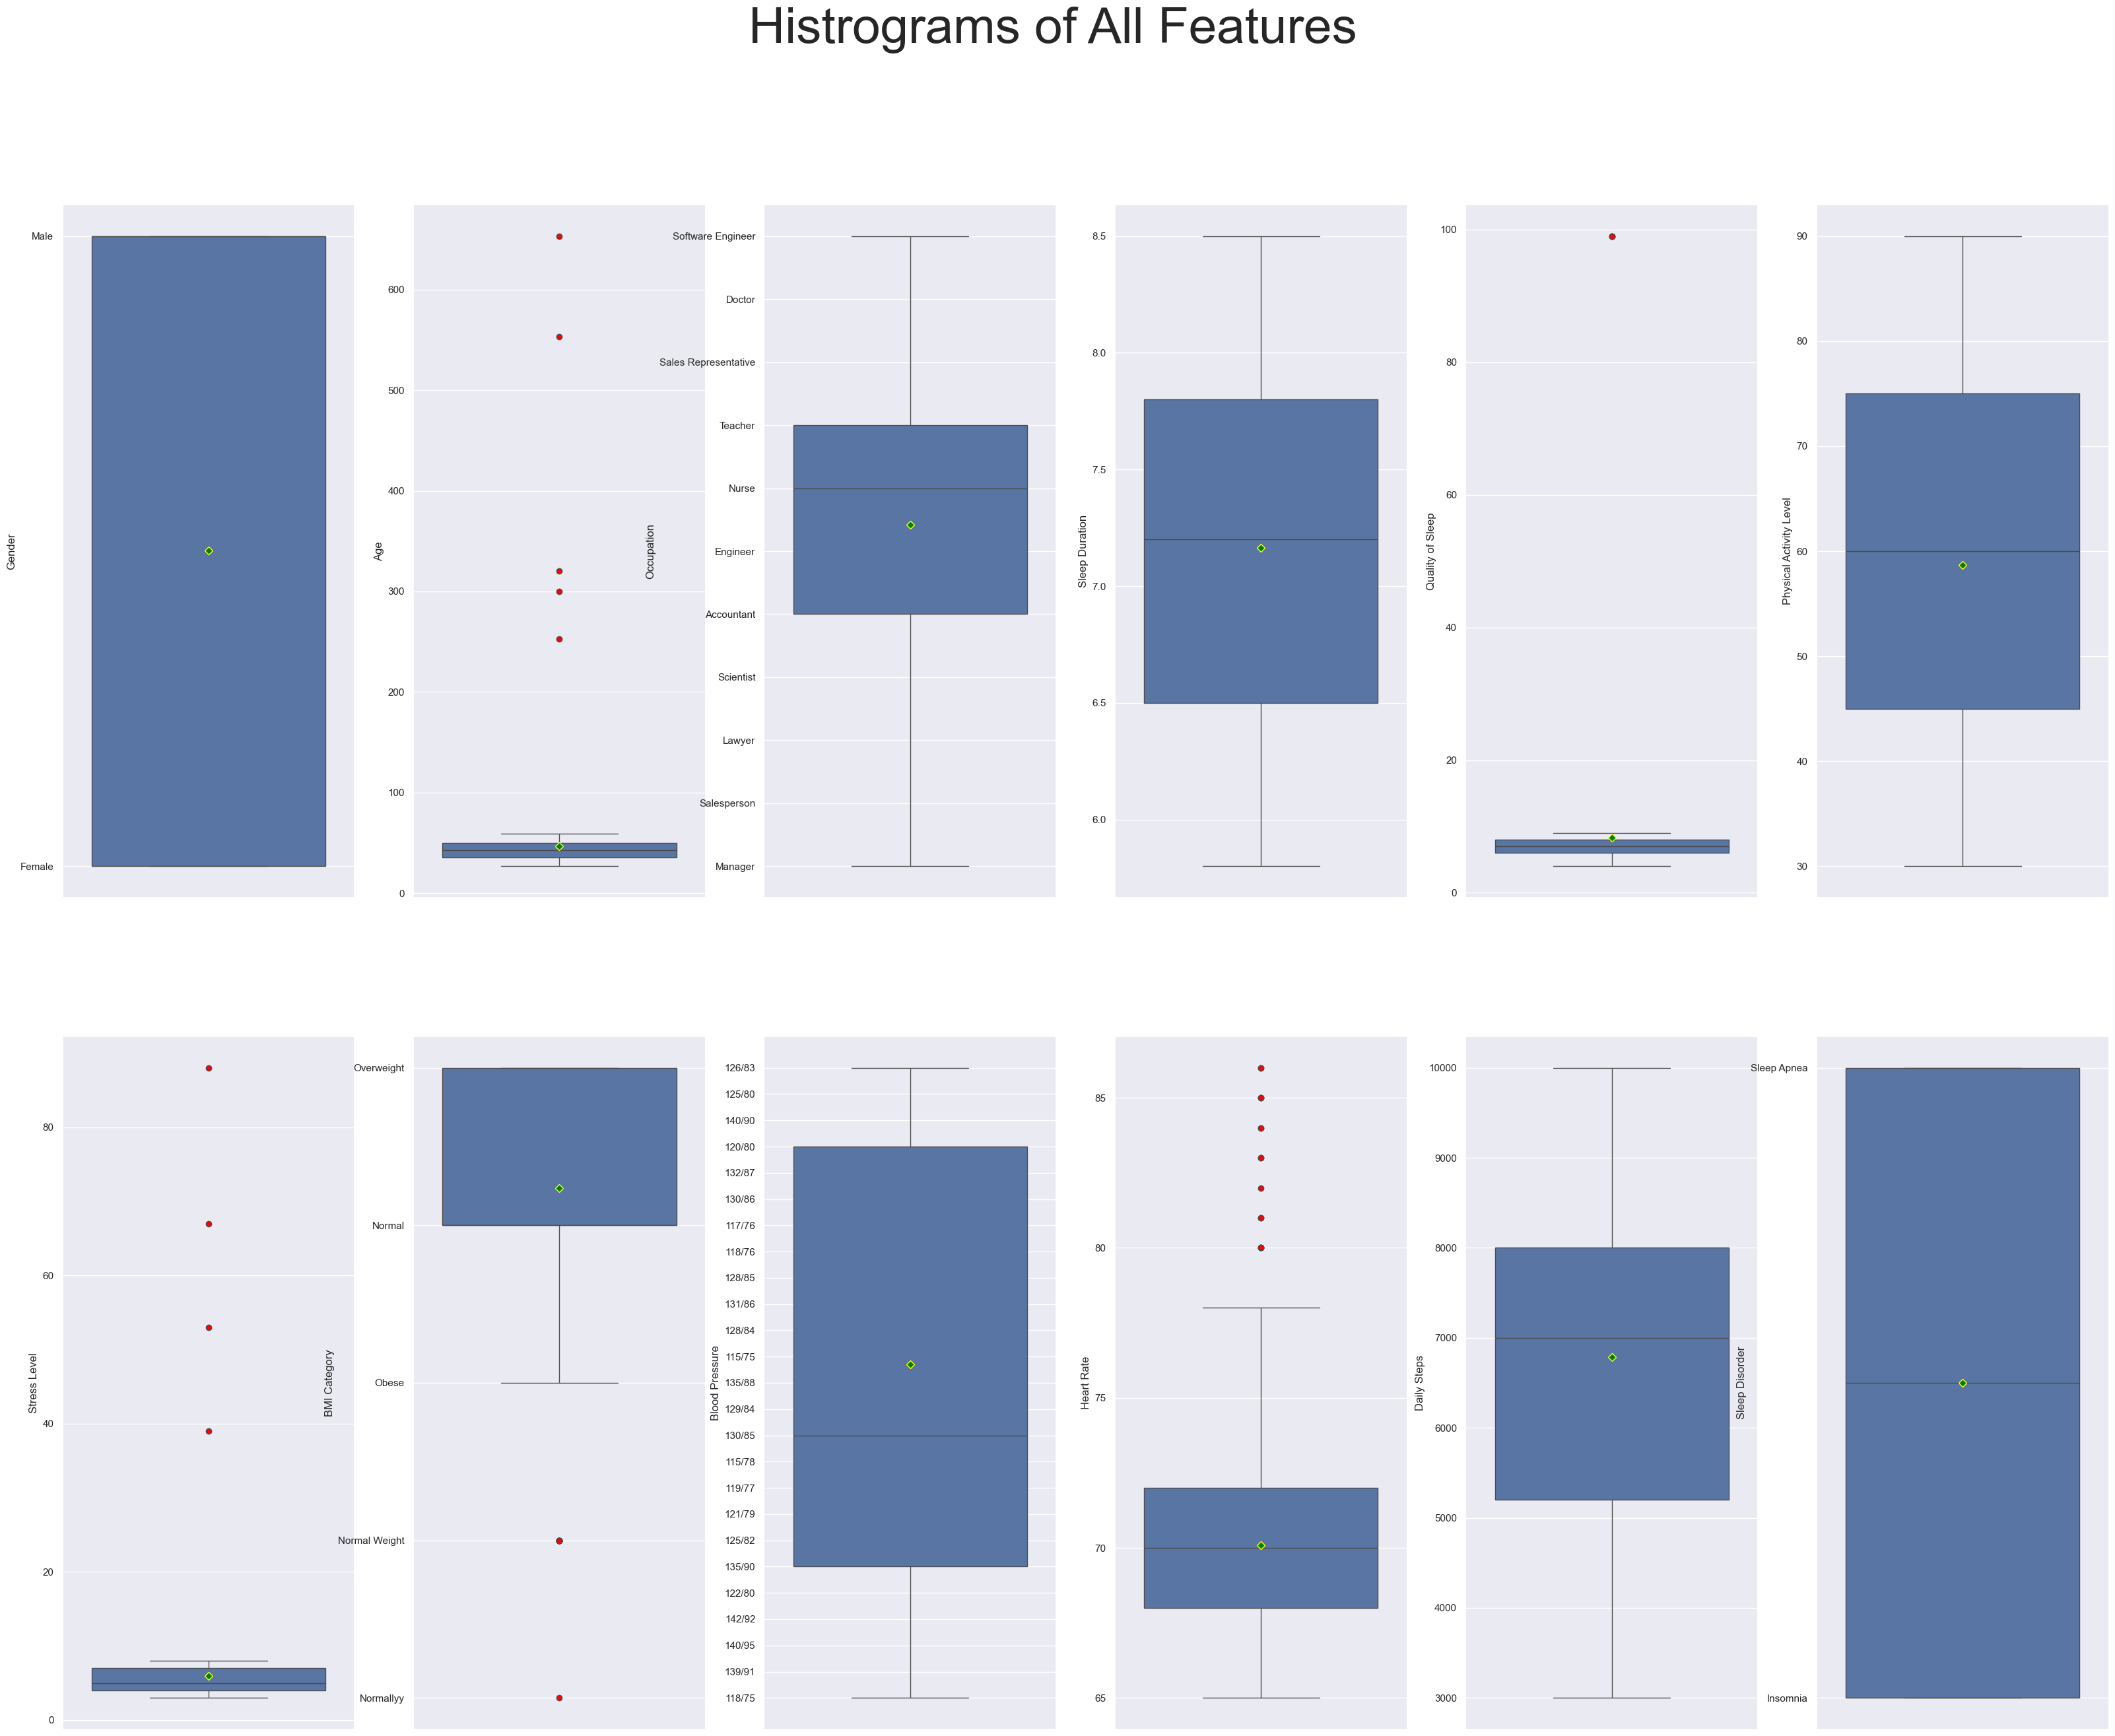

In [8]:
fig, axes = plt.subplots(2,6, figsize=(40,30))
fig.suptitle("Histrograms of All Features", size=55)
lables_list = []

for lable in sleep_health_DATASET.columns:
    lables_list.append(lable)

idx = 0
red_circle = dict(markerfacecolor='red', marker='o')
green_diamond = dict(markerfacecolor='green', marker='D', markeredgecolor='yellow')
for i in range(2):
    for j in range(6):
        idx += 1
        sns.boxplot(ax = axes[i,j],
                    data = sleep_health_DATASET[lables_list[idx]],
                    flierprops = red_circle,
                    showmeans=True,
                    meanprops = green_diamond,
                    legend=True)

# Preprocessing

### Dropping Unnecessary Features

In [9]:
sleep_health_DATASET = sleep_health_DATASET.drop("Person ID", axis=1)
sleep_health_DATASET = sleep_health_DATASET.drop("Sleep Disorder", axis=1)

### Encoding Gender column as 0 & 1

In [10]:
sleep_health_DATASET.loc[sleep_health_DATASET["Gender"] == "Male", "Gender"] = 0
sleep_health_DATASET.loc[sleep_health_DATASET["Gender"] == "Female", "Gender"] = 1
sleep_health_DATASET['Gender'] = sleep_health_DATASET['Gender'].astype(int)

In [11]:
sleep_health_DATASET.info()
sleep_health_DATASET.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   387 non-null    int32  
 1   Age                      387 non-null    int64  
 2   Occupation               387 non-null    object 
 3   Sleep Duration           387 non-null    float64
 4   Quality of Sleep         387 non-null    int64  
 5   Physical Activity Level  387 non-null    int64  
 6   Stress Level             387 non-null    int64  
 7   BMI Category             387 non-null    object 
 8   Blood Pressure           387 non-null    object 
 9   Heart Rate               387 non-null    int64  
 10  Daily Steps              387 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 31.9+ KB


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

### Detecting and Removing Duplicates and Outliers.

#### <h2>For "BMI Category" Column:</h2>

In [12]:
print("########################")
print("### Looking For Duplicates ####")
print("########################")
unique_values = sleep_health_DATASET['BMI Category'].value_counts()
print(unique_values)

print("########################")
print("### AFTER MERGING DUPLICATES ####")
print("########################")
sleep_health_DATASET.loc[sleep_health_DATASET["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
sleep_health_DATASET.loc[sleep_health_DATASET["BMI Category"] == "Normallyy", "BMI Category"] = "Normal"
unique_values = sleep_health_DATASET['BMI Category'].value_counts()
print(unique_values)

print("########################")
print("### AFTER ENCODING ####")
print("########################")
sleep_health_DATASET['BMI Category'] = sleep_health_DATASET['BMI Category'].astype('category')
category_mapping = {"Normal":0,
                    "Overweight":1,
                    "Obese":2}
sleep_health_DATASET['BMI Category'] = sleep_health_DATASET['BMI Category'].map(category_mapping)
unique_values = sleep_health_DATASET['BMI Category'].value_counts()
sleep_health_DATASET['BMI Category'] = sleep_health_DATASET['BMI Category'].astype(int)
print(unique_values)


########################
### Looking For Duplicates ####
########################
BMI Category
Normal           206
Overweight       148
Normal Weight     22
Obese             10
Normallyy          1
Name: count, dtype: int64
########################
### AFTER MERGING DUPLICATES ####
########################
BMI Category
Normal        229
Overweight    148
Obese          10
Name: count, dtype: int64
########################
### AFTER ENCODING ####
########################
BMI Category
0    229
1    148
2     10
Name: count, dtype: int64


#### <h2>For "Occupation" Column:</h2>

In [13]:
print("########################")
print("### Looking For Duplicates ####")
print("########################")
unique_values = sleep_health_DATASET['Occupation'].value_counts()
print(unique_values)

print("########################")
print("### AFTER MERGING DUPLICATES ####")
print("########################")
sleep_health_DATASET.loc[sleep_health_DATASET["Occupation"] == "Software Engineer", "Occupation"] = "Engineer"
unique_values = sleep_health_DATASET['Occupation'].value_counts()
print(unique_values)

print("########################")
print("### AFTER ENCODING ####")
print("########################")
category_mapping2 = {
    'Doctor': 0,
    'Nurse': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Teacher': 4,
    'Accountant': 5,
    'Salesperson': 6,
    'Software Engineer': 7,
    'Scientist': 8,
    'Sales Representative': 9,
    'Manager': 10
}
sleep_health_DATASET['Occupation'] = sleep_health_DATASET['Occupation'].astype('category')
sleep_health_DATASET['Occupation'] = sleep_health_DATASET['Occupation'].map(category_mapping2)
unique_values = sleep_health_DATASET['Occupation'].value_counts()
print(unique_values)

### Getting rid of values that Has Negligable amount of occurances
min_threshold = sleep_health_DATASET['Occupation'].value_counts().quantile(0.25)
for occ in sleep_health_DATASET['Occupation'].unique():
    if (sleep_health_DATASET['Occupation'] == occ).sum() < min_threshold:
        sleep_health_DATASET = sleep_health_DATASET[sleep_health_DATASET['Occupation'] != occ]
unique_values = sleep_health_DATASET['Occupation'].value_counts()
sleep_health_DATASET['Occupation'] = sleep_health_DATASET['Occupation'].astype(int)
print(unique_values)

########################
### Looking For Duplicates ####
########################
Occupation
Doctor                  75
Nurse                   74
Engineer                71
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
########################
### AFTER MERGING DUPLICATES ####
########################
Occupation
Engineer                75
Doctor                  75
Nurse                   74
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
########################
### AFTER ENCODING ####
########################
Occupation
0     75
2     75
1     74
3     47
4     40
5     37
6     32
8      4
9      2
10     1
Name: count, dtype

#### <h2>For "Blood Pressure" Column:</h2>


In [14]:
bp_normal = (120+80)/2
bp_high = (140+90)/2
print(sleep_health_DATASET['Blood Pressure'].value_counts())

# CATEGORIZING THE DATA
for pressure in sleep_health_DATASET['Blood Pressure'].unique():
    high,low = map(int,pressure.split("/"))
    mid_val = (high+low)/2
    if mid_val < bp_normal:
        sleep_health_DATASET.loc[sleep_health_DATASET["Blood Pressure"] == pressure, "Blood Pressure"] = "Low"
    elif bp_high >= mid_val >= bp_normal:
        sleep_health_DATASET.loc[sleep_health_DATASET["Blood Pressure"] == pressure, "Blood Pressure"] = "Normal"
    elif mid_val > bp_high:
        sleep_health_DATASET.loc[sleep_health_DATASET["Blood Pressure"] == pressure, "Blood Pressure"] = "High"

# ENCODING THE DATA
category_mapping3 = {"Low": 0,
                    "Normal": 1,
                    "High":2}
print(sleep_health_DATASET['Blood Pressure'].value_counts())
sleep_health_DATASET['Blood Pressure'] = sleep_health_DATASET['Blood Pressure'].map(category_mapping3)
sleep_health_DATASET['Blood Pressure'] = sleep_health_DATASET['Blood Pressure'].astype(int)
print(sleep_health_DATASET['Blood Pressure'].value_counts())

Blood Pressure
130/85    99
125/80    73
140/95    65
120/80    49
115/75    32
135/90    27
132/87     4
125/82     3
139/91     2
142/92     2
119/77     2
115/78     2
126/83     2
129/84     2
135/88     2
128/84     2
117/76     2
130/86     2
140/90     2
118/75     2
128/85     1
121/79     1
118/76     1
122/80     1
Name: count, dtype: int64
Blood Pressure
Normal    272
High       67
Low        41
Name: count, dtype: int64
Blood Pressure
1    272
2     67
0     41
Name: count, dtype: int64


In [15]:
sleep_health_DATASET.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.494737,47.302632,2.373684,7.182368,8.328947,59.028947,5.915789,0.418421,1.068421,69.902632,6822.631579
std,0.500631,47.094140,1.903293,0.798765,9.434943,20.969804,6.310628,0.534980,0.529402,3.944669,1605.354964
min,0.000000,27.000000,0.000000,5.900000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,3000.000000
25%,0.000000,36.000000,1.000000,6.500000,6.000000,45.000000,4.000000,0.000000,1.000000,68.000000,5575.000000
50%,0.000000,43.000000,2.000000,7.200000,7.000000,60.000000,5.000000,0.000000,1.000000,70.000000,7000.000000
75%,1.000000,50.000000,4.000000,7.800000,8.000000,75.000000,7.000000,1.000000,1.000000,72.000000,8000.000000
max,1.000000,653.000000,6.000000,8.500000,99.000000,90.000000,88.000000,2.000000,2.000000,86.000000,10000.000000


#### <h2>For "Age" Column:</h2>


<AxesSubplot: ylabel='Age'>

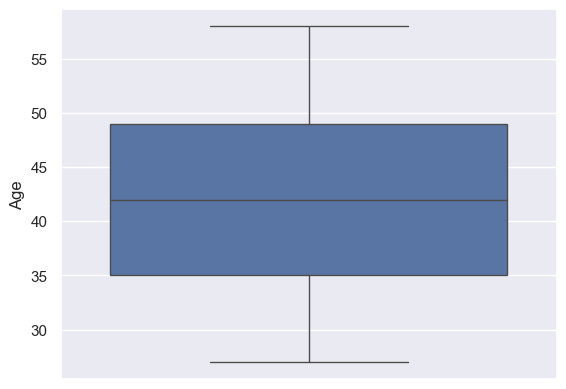

In [16]:
max_threshold = sleep_health_DATASET['Age'].quantile(0.95)
sleep_health_DATASET = sleep_health_DATASET[(sleep_health_DATASET["Age"]<max_threshold)]
sns.boxplot(data = sleep_health_DATASET["Age"])

#### <h2>For "Stress Level" Column:</h2>


<AxesSubplot: ylabel='Stress Level'>

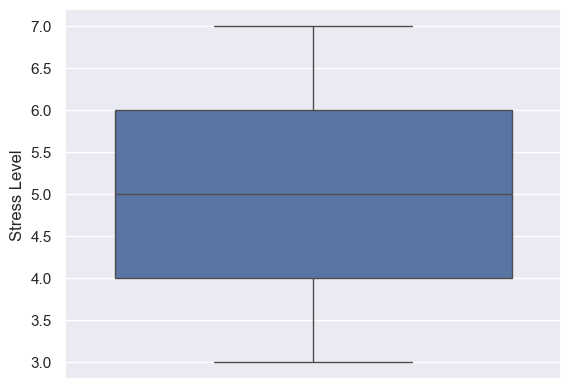

In [17]:
max_threshold = sleep_health_DATASET["Stress Level"].quantile(0.95)
sleep_health_DATASET = sleep_health_DATASET[(sleep_health_DATASET["Stress Level"]<max_threshold)]
sns.boxplot(data = sleep_health_DATASET["Stress Level"])

#### <h2>For "Quality of Sleep" Column:</h2>


<AxesSubplot: ylabel='Quality of Sleep'>

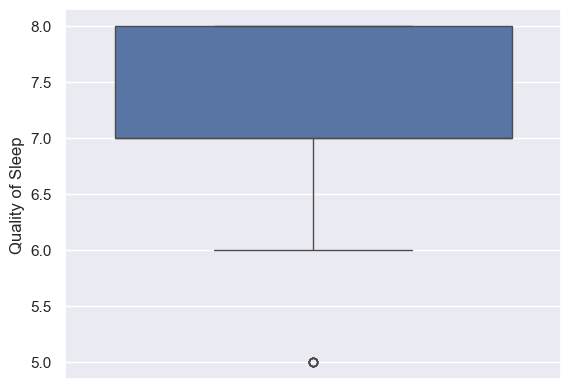

In [18]:
max_threshold = sleep_health_DATASET['Quality of Sleep'].quantile(0.95)
sleep_health_DATASET = sleep_health_DATASET[(sleep_health_DATASET["Quality of Sleep"]<max_threshold)]
sns.boxplot(data = sleep_health_DATASET["Quality of Sleep"])

In [19]:
print( sleep_health_DATASET['Quality of Sleep'].value_counts())

Quality of Sleep
8    109
7     77
6     38
5      7
Name: count, dtype: int64


In [20]:
sleep_health_DATASET.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 376
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   231 non-null    int32  
 1   Age                      231 non-null    int64  
 2   Occupation               231 non-null    int32  
 3   Sleep Duration           231 non-null    float64
 4   Quality of Sleep         231 non-null    int64  
 5   Physical Activity Level  231 non-null    int64  
 6   Stress Level             231 non-null    int64  
 7   BMI Category             231 non-null    int32  
 8   Blood Pressure           231 non-null    int32  
 9   Heart Rate               231 non-null    int64  
 10  Daily Steps              231 non-null    int64  
dtypes: float64(1), int32(4), int64(6)
memory usage: 18.0 KB


# Visualization of the Data After Preprocessing

### BoxPlot

['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']


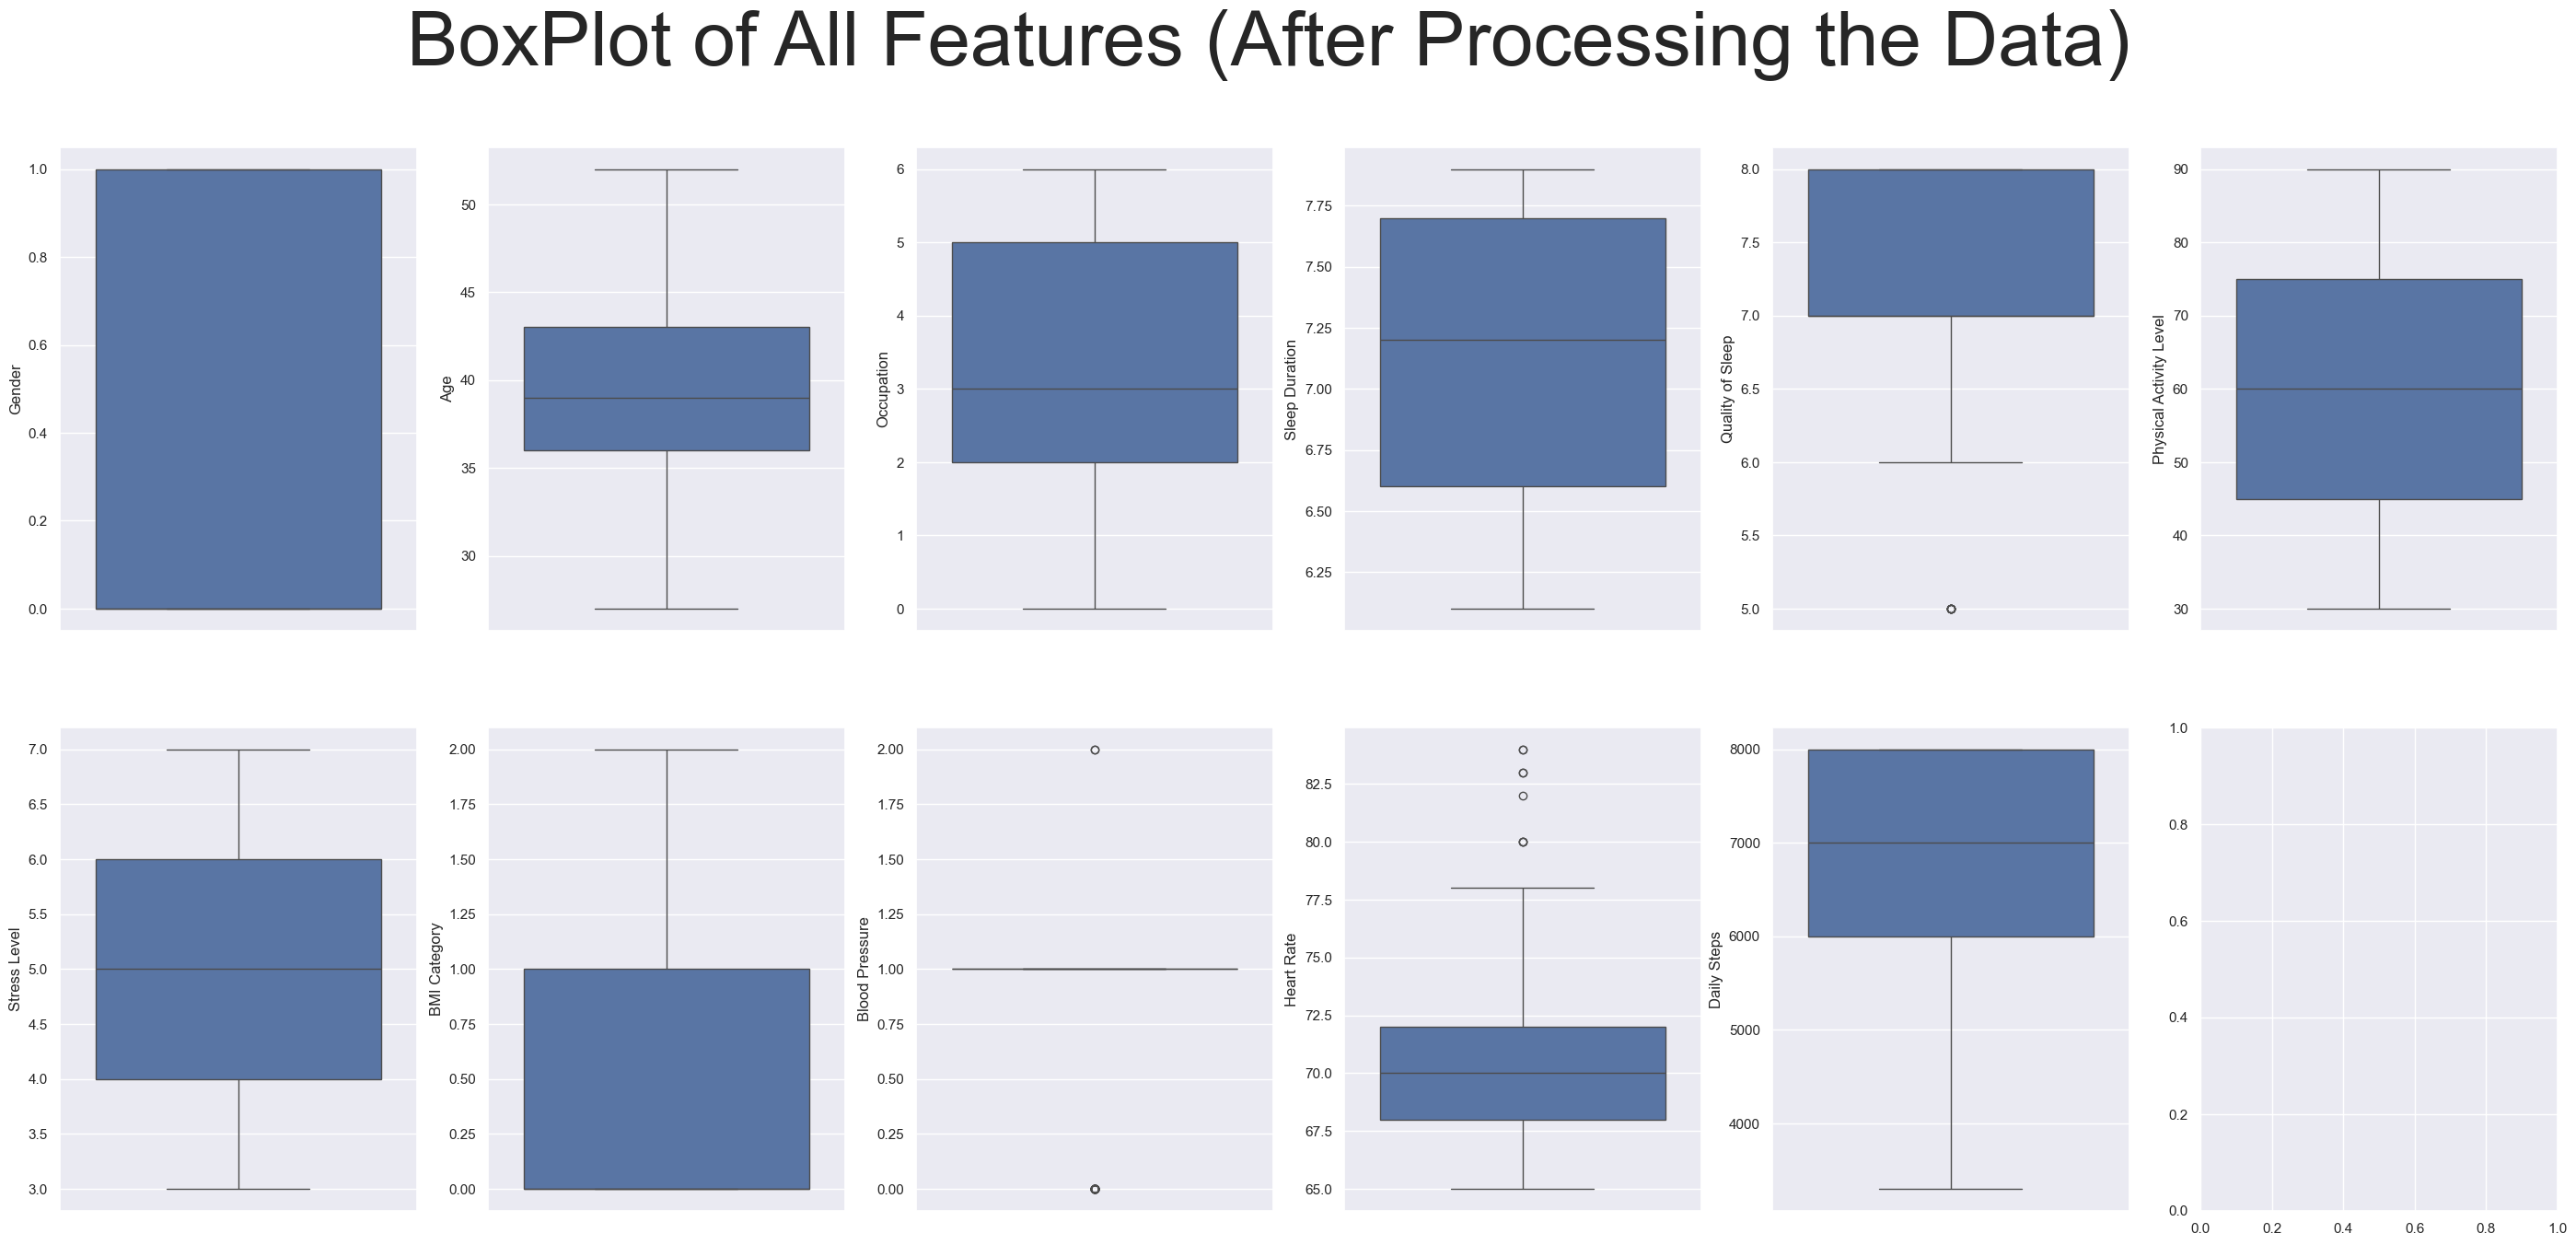

In [21]:
fig2, axes2 = plt.subplots(2,6, figsize=(35,15))
fig2.suptitle("BoxPlot of All Features (After Processing the Data)", size=60)
lables_list2 = []

for lable in sleep_health_DATASET.columns:
    lables_list2.append(lable)

idx2 = 0
print(lables_list2)
for i in range(2):
    for j in range(6):
        idx2 += 1
        if idx2>11:
            break
        sns.boxplot(ax = axes2[i,j],
                     data = sleep_health_DATASET[lables_list[idx2]],
                     legend=True)

# Training & Testing The Model

## Important imports

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Tran-Test-Split

In [23]:
X = sleep_health_DATASET.drop(columns=['Stress Level'])
y = sleep_health_DATASET['Stress Level']
# Train = 80% and Test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest

In [24]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       1.00      0.89      0.94         9
           7       0.91      1.00      0.95        10

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.97        47
weighted avg       0.98      0.98      0.98        47



## Logistic Regression

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_regression_model.fit(X_train_scaled, y_train)

y_pred2 = logistic_regression_model.predict(X_test_scaled)

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.93      0.96        14
           5       0.88      1.00      0.93        14
           6       1.00      0.78      0.88         9
           7       0.91      1.00      0.95        10

    accuracy                           0.94        47
   macro avg       0.95      0.93      0.93        47
weighted avg       0.94      0.94      0.94        47



## Testing With Manual Data Input

In [29]:
count = 1
print("<< Required Features of the System are, >>")
for feature in (X.columns.tolist()):
    print(count,"|",feature)
    count += 1

<< Required Features of the System are, >>
1 | Gender
2 | Age
3 | Occupation
4 | Sleep Duration
5 | Quality of Sleep
6 | Physical Activity Level
7 | BMI Category
8 | Blood Pressure
9 | Heart Rate
10 | Daily Steps


In [27]:
category_mapping_decode_1 = {
    "male":0,
    "female":1,
    }
category_mapping_decode_2 = {
    "normal":0,
    "overweight":1,
    "obese":2
    }
category_mapping_decode_3 = {
    'doctor': 0,
    'nurse': 1,
    'engineer': 2,
    'lawyer': 3,
    'teacher': 4,
    'accountant': 5,
    'salesperson': 6,
    'software engineer': 7,
    }
category_mapping_decode_4 = {
    "low": 0,
    "normal": 1,
    "high":2
    }

user_gender = input("Enter Gender(Male/Female): ")
user_age = int(input("Enter Your Age: "))
user_occupation = input("Enter Your Occupation: ")
user_sleep_duration = float(input("How many hours do you sleep: "))
user_sleep_quality = int(input("Enter your sleep quality (1-10): "))
user_physical_activity = int(input("Enter your physical activity lvl (1-10): "))
user_bmi = input("Enter your BMI(normal/overweight/obese): ")
user_blood_pressure = input("Enter your blood pressure(low / normal / high): ")
user_heart_rate = int(input("Enter your heart rate: "))
user_daily_steps = int(input("Enter your average Daily Steps: "))

user_gender = category_mapping_decode_1[user_gender.lower()]
user_occupation = category_mapping_decode_3[user_occupation.lower()]
user_bmi = category_mapping_decode_2[user_bmi.lower()]
user_blood_pressure = category_mapping_decode_4[user_blood_pressure.lower()]

random_input_df = pd.DataFrame(
    [[user_gender,
      user_age,
      user_occupation,
      user_sleep_duration,
      user_sleep_quality,
      user_physical_activity,
      user_bmi,
      user_blood_pressure,
      user_heart_rate,
      user_daily_steps]],
    columns=X.columns
)

pred_1 = random_forest_model.predict(random_input_df)

print("Predicted Stress Level:", pred_1[0])

Enter Gender(Male/Female):  male
Enter Your Age:  28
Enter Your Occupation:  teacher
How many hours do you sleep:  8
Enter your sleep quality (1-10):  10
Enter your physical activity lvl (1-10):  10
Enter your BMI(normal/overweight/obese):  normal
Enter your blood pressure(low / normal / high):  normal
Enter your heart rate:  80
Enter your average Daily Steps:  10000


Predicted Stress Level: 3
